<a href="https://colab.research.google.com/github/Mattlee10/zone2/blob/main/Matt's_labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. CSV 파일 불러오기

In [5]:
import pandas as pd

# CSV 경로 설정
csv_path = '/content/drive/MyDrive/CareSensAir_Export_L.csv'

# CSV 파일 불러오기
df = pd.read_csv(csv_path)

# 데이터 프레임 간단히 확인
df.head()

,Device,Serial Number,Sequence,Date and Time,Glucose Value,Unit,Trend Rate
0,CareSens Air,C1Q3H0A00232,6,2025-05-08 20:10:29,113,mg/dL,NaN
1,CareSens Air,C1Q3H0A00232,7,2025-05-08 20:15:29,110,mg/dL,NaN
2,CareSens Air,C1Q3H0A00232,8,2025-05-08 20:20:29,107,mg/dL,NaN
3,CareSens Air,C1Q3H0A00232,9,2025-05-08 20:25:29,106,mg/dL,NaN
4,CareSens Air,C1Q3H0A00232,10,2025-05-08 20:30:29,104,mg/dL,NaN


2. 날짜/시간 파싱 및 파생 컬럼 생성

In [6]:
# 'Date and Time' 문자열을 datetime 타입으로 변환
df['Date and Time'] = pd.to_datetime(df['Date and Time'])

# 날짜(date), 시(hour) 파생 컬럼 추가
df['date'] = df['Date and Time'].dt.date
df['hour'] = df['Date and Time'].dt.hour

# 필요한 컬럼만 미리 보기
df[['Date and Time', 'Glucose Value', 'date', 'hour']].head()

,Date and Time,Glucose Value,date,hour
0,2025-05-08 20:10:29,113,2025-05-08,20
1,2025-05-08 20:15:29,110,2025-05-08,20
2,2025-05-08 20:20:29,107,2025-05-08,20
3,2025-05-08 20:25:29,106,2025-05-08,20
4,2025-05-08 20:30:29,104,2025-05-08,20


3. 아침 시간대(06:00 - 09:00) 필터링

In [7]:
# 아침 6시 이상 ~ 9시 미만 데이터만 추출
morning_df = df[(df['hour'] >= 6) & (df['hour'] < 9)]

# 결과 확인
print("아침 시간대 데이터 개수:", len(morning_df))
morning_df[['Date and Time', 'Glucose Value']].head()

아침 시간대 데이터 개수: 252


,Date and Time,Glucose Value
118,2025-05-09 06:00:29,107
119,2025-05-09 06:05:29,107
120,2025-05-09 06:10:29,107
121,2025-05-09 06:15:29,106
122,2025-05-09 06:20:29,106


4. 일자별 혈당 통계 요약(평균, 최대, 최소, 표준편차)

In [9]:
# 일자별 아침 혈당 요약
summary = morning_df.groupby('date')['Glucose Value'].agg(
    mean='mean',
    max='max',
    min='min',
    std='std'
).reset_index()

# 결과 출력
print("일자별 아침 혈당 통계:")
print(summary)

일자별 아침 혈당 통계:
         date        mean  max  min        std
0  2025-05-09   95.222222  110   71  12.284976
1  2025-05-10   92.111111  100   68   9.614803
2  2025-05-11  102.694444  114   91   6.032386
3  2025-05-12  100.472222  109   95   3.238043
4  2025-05-13  109.833333  122   88   8.686607
5  2025-05-14  113.555556  119  108   3.027912
6  2025-05-15  108.416667  114  103   3.628262


5. 아침 혈당 변화 시계열 시각화

<ipython-input-10-206667e8c511>:16: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-206667e8c511>:16: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-206667e8c511>:16: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-206667e8c511>:16: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-206667e8c511>:16: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-206667e8c511>:16: UserWarning: Glyph 52840 (\N{HANGUL SYLLABLE CIM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-206667e8c511>:16: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyth

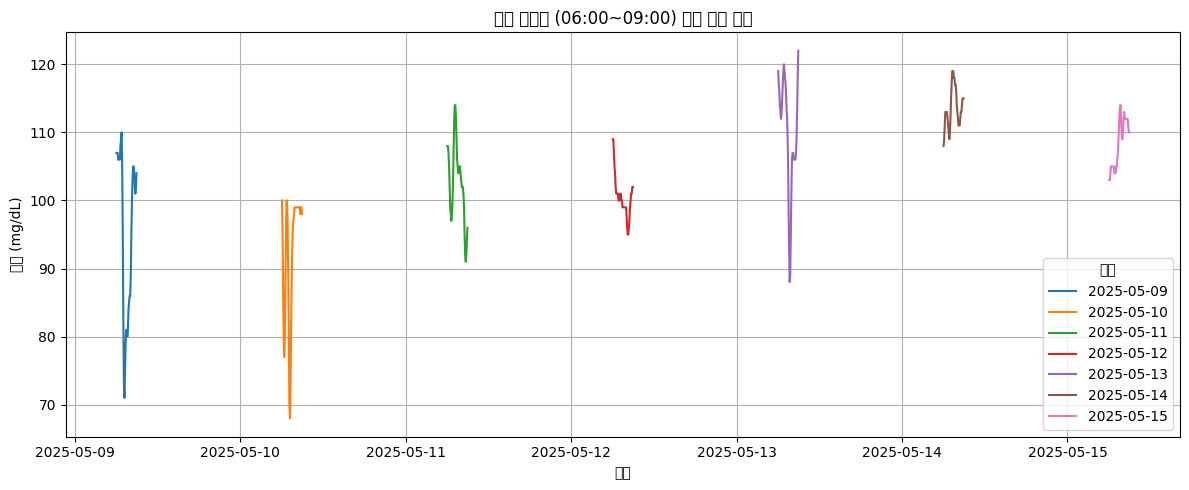

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# 날짜별 곡선 그리기
for d in morning_df['date'].unique():
    day_data = morning_df[morning_df['date'] == d]
    plt.plot(day_data['Date and Time'], day_data['Glucose Value'], label=str(d))

# 시각화 설정
plt.title('아침 시간대 (06:00~09:00) 혈당 변화 추이')
plt.xlabel('시간')
plt.ylabel('혈당 (mg/dL)')
plt.legend(title='날짜')
plt.grid(True)
plt.tight_layout()
plt.show()